# Red Wine Quality Prediction

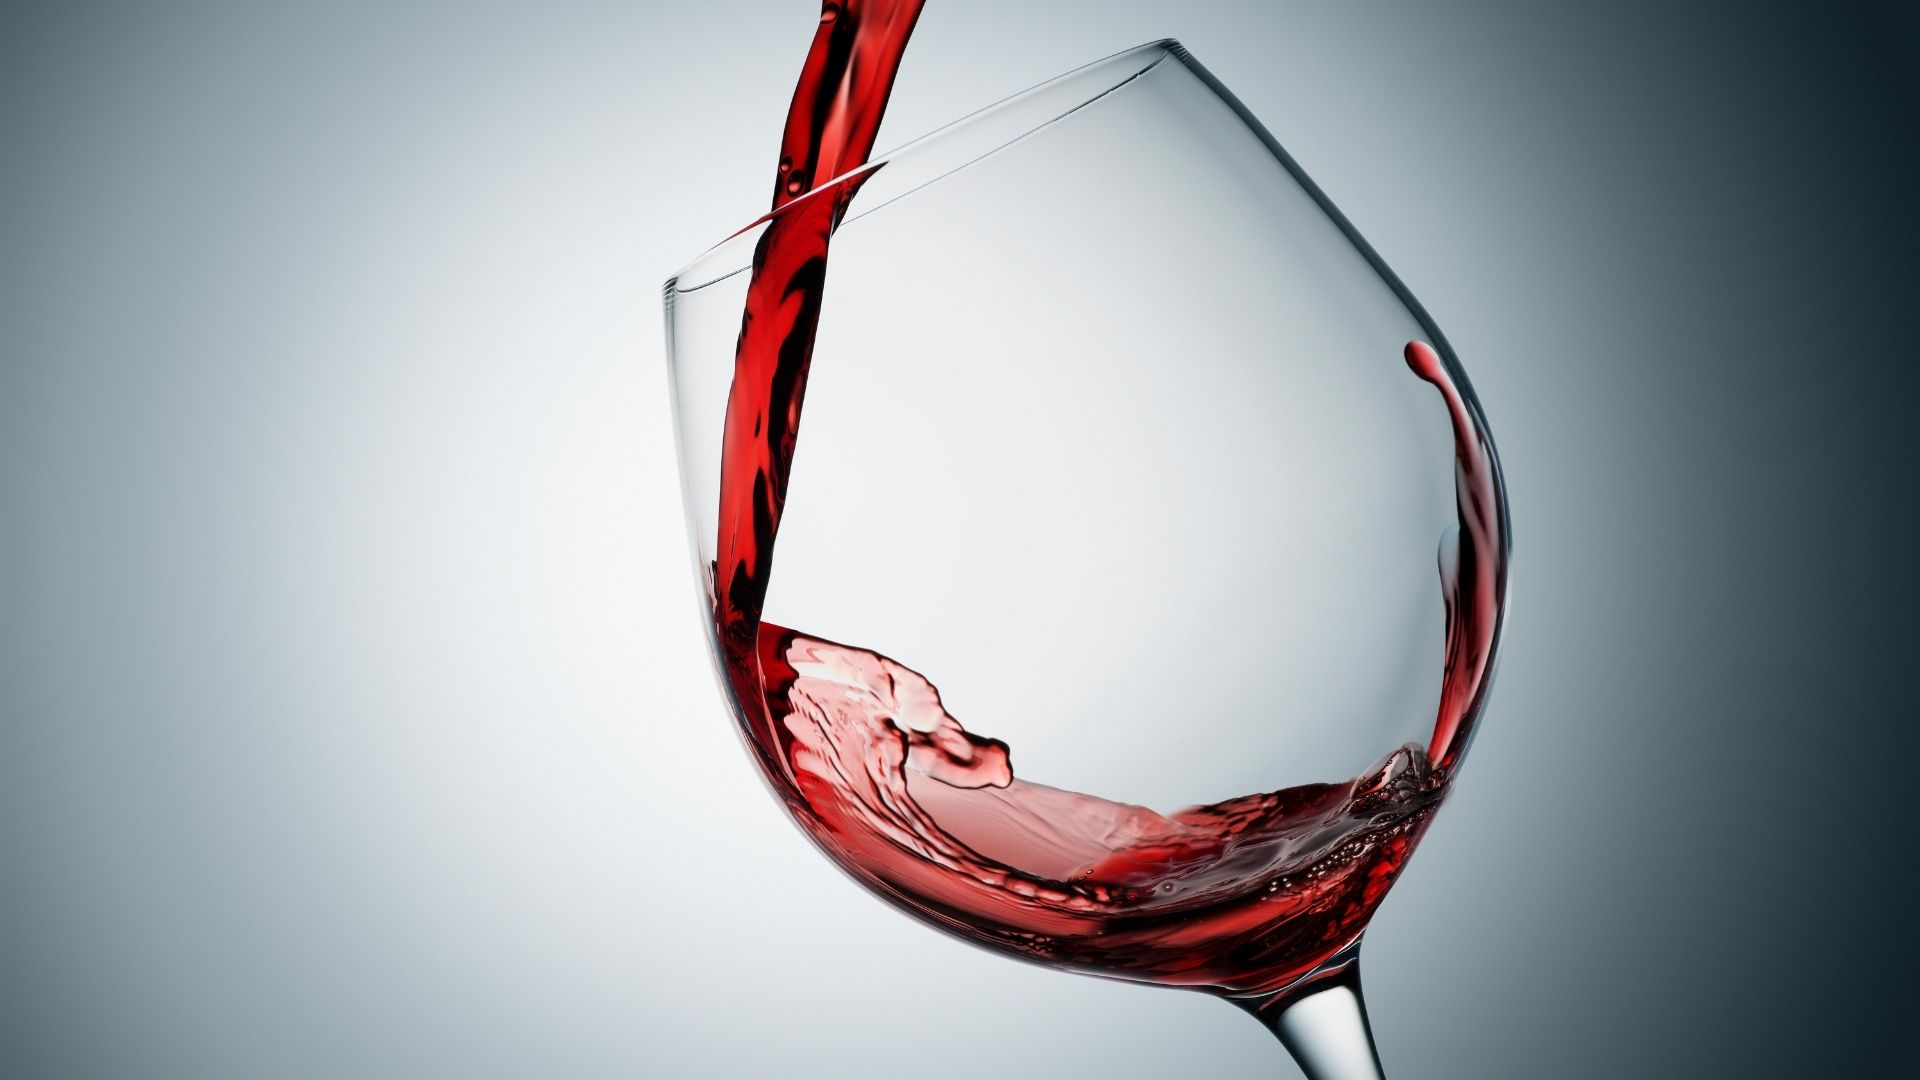

## Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn import metrics

## Load data

In [21]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## Data summary

In [23]:
df.shape

(1599, 12)

In [24]:
df.duplicated().sum()

240

In [25]:
df.isnull().sum().to_frame()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [26]:
df = df.drop_duplicates(subset=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'], keep='last')

In [27]:
df.shape

(1359, 12)

In [28]:
df.duplicated().sum()

0

In [29]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [30]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [31]:
df.isnull().sum().to_frame()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 1 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [33]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Cross validation

In [41]:
# we create a new column called kfold and fill it with -1 
df["kfold"] = -1 
# the next step is to randomize the rows of the data 
df = df.sample(frac=1).reset_index(drop=True) 
# calculate the number of bins by Sturge's rule 
num_bins = int(np.floor(1 + np.log2(len(df)))) 
# bin targets 
df.loc[:, "bins"] = pd.cut( df["quality"], bins=num_bins, labels=False ) 
# initiate the kfold class from model_selection module
kf = StratifiedKFold(n_splits=5) 
# fill the new kfold column # note that, instead of targets, we use bins! 
for f, (t_, v_) in enumerate(kf.split(X=df, y=df.bins.values)): 
    df.loc[v_, 'kfold'] = f 
# drop the bins column 
df = df.drop("bins", axis=1)

In [42]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,6.8,0.77,0.00,1.8,0.066,34.0,52.0,0.99760,3.62,0.68,9.9,5,0
1,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4,6,0
2,6.7,0.41,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6,6,0
3,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6,7,0
4,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.8,6,0


In [43]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
1354,7.0,0.36,0.21,2.4,0.086,24.0,69.0,0.99556,3.40,0.53,10.1,6,4
1355,7.4,0.53,0.12,1.9,0.165,4.0,12.0,0.99702,3.26,0.86,9.2,5,4
1356,8.0,0.60,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9,5,4
1357,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5,4
1358,7.8,0.50,0.09,2.2,0.115,10.0,42.0,0.99710,3.18,0.62,9.5,5,4


In [44]:
df = df.drop("kfold", axis=1)

In [45]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.77,0.00,1.8,0.066,34.0,52.0,0.99760,3.62,0.68,9.9,5
1,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4,6
2,6.7,0.41,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6,6
3,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6,7
4,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.8,6


## Exploratory data analysis

### quality

In [46]:
df.quality.value_counts().to_frame()

,quality
5,577
6,535
7,167
4,53
8,17
3,10


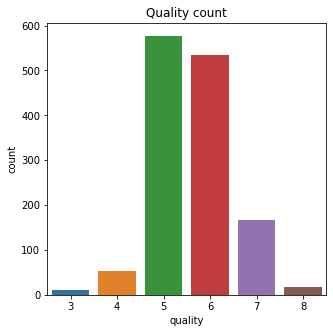

In [47]:
plt.figure(figsize=(5,5))
plt.title('Quality count')
sns.countplot(df.quality)

### fixed acidity

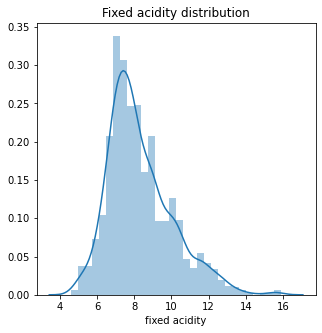

In [48]:
plt.figure(figsize=(5,5))
plt.title('Fixed acidity distribution')
sns.distplot(df['fixed acidity'])

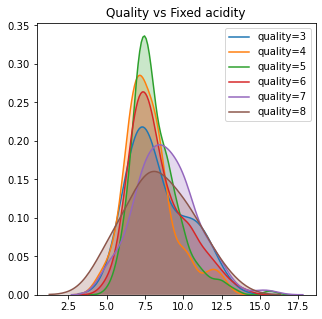

In [52]:
plt.figure(figsize=(5,5))
plt.title('Quality vs Fixed acidity')
plot = sns.kdeplot(df['fixed acidity'].loc[df.quality == 3], shade=True, label='quality=3')
plot = sns.kdeplot(df['fixed acidity'].loc[df.quality == 4], shade=True, label='quality=4')
plot = sns.kdeplot(df['fixed acidity'].loc[df.quality == 5], shade=True, label='quality=5')
plot = sns.kdeplot(df['fixed acidity'].loc[df.quality == 6], shade=True, label='quality=6')
plot = sns.kdeplot(df['fixed acidity'].loc[df.quality == 7], shade=True, label='quality=7')
plot = sns.kdeplot(df['fixed acidity'].loc[df.quality == 8], shade=True, label='quality=8')

In [53]:
quality_map = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}
df.loc[:, 'quality'] = df.quality.map(quality_map)

In [54]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.77,0.00,1.8,0.066,34.0,52.0,0.99760,3.62,0.68,9.9,2
1,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4,3
2,6.7,0.41,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6,3
3,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6,4
4,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.8,3


In [55]:
df.quality.value_counts().to_frame()

,quality
2,577
3,535
4,167
1,53
5,17
0,10


## Train-test split

In [59]:
df.sample(frac=1).reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.2,0.54,0.31,2.30,0.112,11.0,38.0,0.99699,3.24,0.56,10.9,2
1,9.2,0.43,0.49,2.40,0.086,23.0,116.0,0.99760,3.23,0.64,9.5,2
2,6.6,0.63,0.00,4.30,0.093,51.0,77.5,0.99558,3.20,0.45,9.5,2
3,7.8,0.53,0.33,2.40,0.080,24.0,144.0,0.99655,3.30,0.60,9.5,2
4,6.9,0.45,0.11,2.40,0.043,6.0,12.0,0.99354,3.30,0.65,11.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,11.9,0.40,0.65,2.15,0.068,7.0,27.0,0.99880,3.06,0.68,11.3,3
1355,8.8,0.42,0.21,2.50,0.092,33.0,88.0,0.99823,3.19,0.52,9.2,2
1356,8.2,0.31,0.40,2.20,0.058,6.0,10.0,0.99536,3.31,0.68,11.2,4
1357,6.6,0.52,0.04,2.20,0.069,8.0,15.0,0.99560,3.40,0.63,9.4,3


In [60]:
df_train = df.head(1000)
df_test = df.tail(359)

In [61]:
df_train.shape

(1000, 12)

In [62]:
df_test.shape

(359, 12)

## Classification models and Performance metrics

### DecisionTreeClassifier

In [65]:
clf = tree.DecisionTreeClassifier(max_depth=3)

# columns you want to train 
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol']

# train the model on provided features

clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [66]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculating accuracy on train data
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# calculating accuracy on test data
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

print(f"Train accuracy is {train_accuracy}")
print(f"Test accuracy is {test_accuracy}")

Train accuracy is 0.581
Test accuracy is 0.5710306406685237


In [67]:
# increasing depth to 9
clf = tree.DecisionTreeClassifier(max_depth=9)
clf.fit(df_train[cols], df_train.quality)

# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculating accuracy on train data
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# calculating accuracy on test data
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

print(f"Train accuracy is {train_accuracy}")
print(f"Test accuracy is {test_accuracy}")

Train accuracy is 0.843
Test accuracy is 0.5069637883008357


### Plot for different values of max_depth

In [68]:
# intialize list to store accuracies for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    clf.fit(df_train[cols], df_train.quality)

    # create training and test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    # calculate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

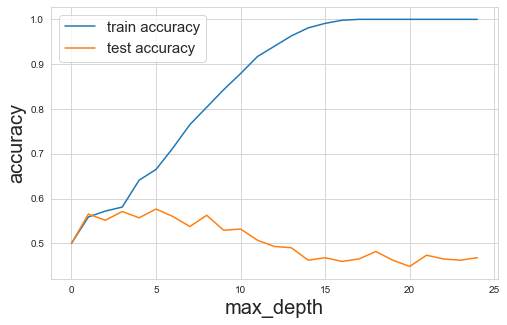

In [69]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

### RandomForestClassifier

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

# intialize list to store accuracies for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    rf_clf = RandomForestClassifier(max_depth=depth)

    rf_clf.fit(df_train[cols], df_train.quality)

    # create training and test predictions
    train_predictions = rf_clf.predict(df_train[cols])
    test_predictions = rf_clf.predict(df_test[cols])
    
    # calculate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

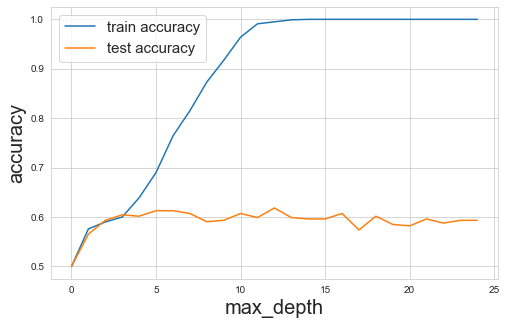

In [81]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

## Cross validation

In [82]:
X = df[cols]
y = df['quality']
X_train = df_train[cols]
y_train = df_train.quality
X_test = df_test[cols]
y_test = df_test.quality

In [83]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5)
accuracy = []
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
    rf_clf.fit(X_train_fold, y_train_fold)
    accuracy.append(rf_clf.score(X_test_fold, y_test_fold))
    
print('Accuracy on all folds: ', accuracy)
print('Mean accuracy: ', np.mean(accuracy))

Accuracy on all folds:  [0.6029411764705882, 0.5955882352941176, 0.6433823529411765, 0.5551470588235294, 0.6125461254612546]
Mean accuracy:  0.6019209897981332


In [84]:
print('Test set score: ', rf_clf.score(X_test, y_test))

Test set score:  0.7075208913649025
